## **1**.Understanding the Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1.Understanding the Data:

diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


## **2**.Data Cleaning

In [ ]:
# 2.Data Cleaning:

#Handle Missing Values
# Check for missing values in each column:
print(diabetes_data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Check for and remove duplicate rows:
print(diabetes_data.duplicated().sum())
diabetes_data.drop_duplicates(inplace=True)

0


------identify outliers------


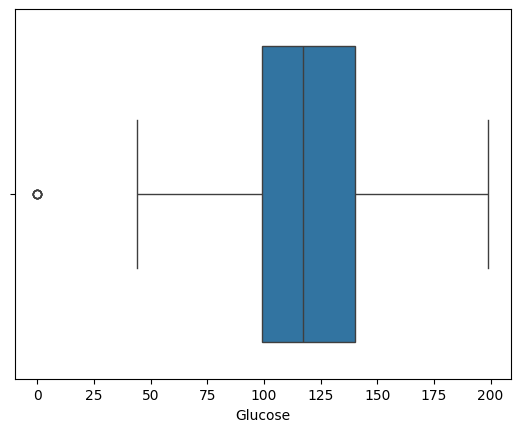

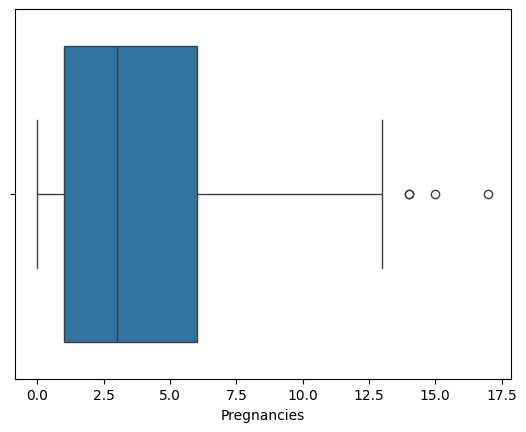

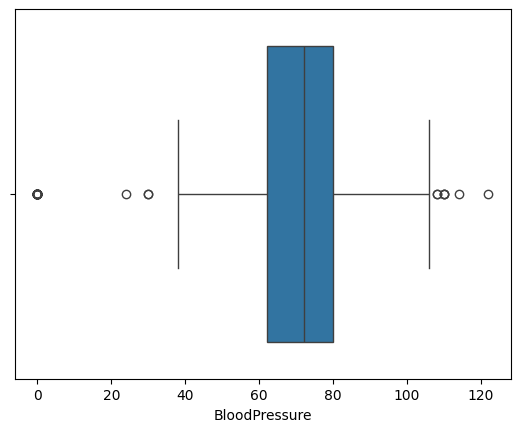

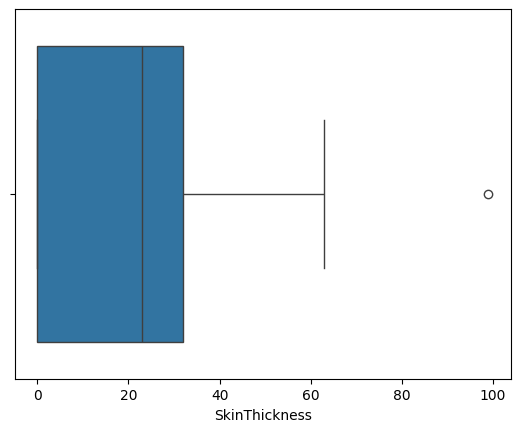

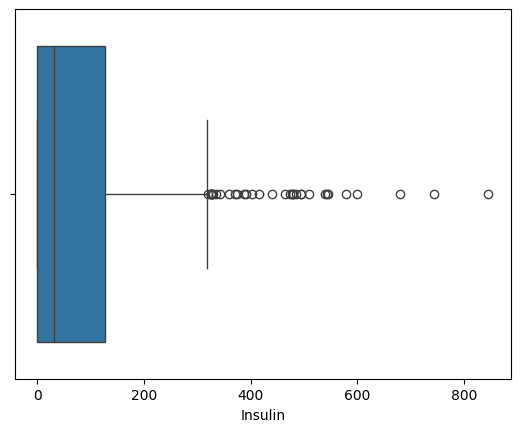

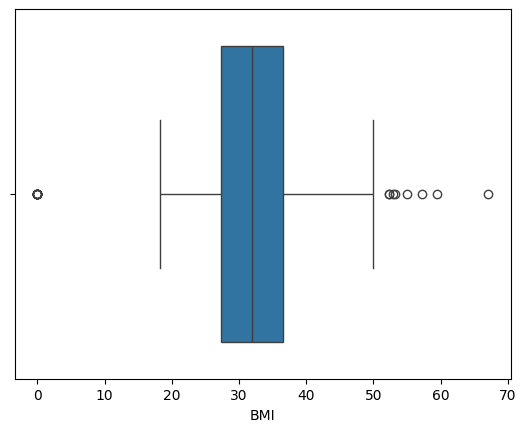

In [ ]:
# identify outliers

sns.boxplot(x=diabetes_data['Glucose'])
plt.show()
sns.boxplot(x=diabetes_data['Pregnancies'])
plt.show()
sns.boxplot(x=diabetes_data['BloodPressure'])
plt.show()
sns.boxplot(x=diabetes_data['SkinThickness'])
plt.show()
sns.boxplot(x=diabetes_data['Insulin'])
plt.show()
sns.boxplot(x=diabetes_data['BMI'])
plt.show()



In [ ]:
# Checking for datatype for each column
print(diabetes_data.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


##**3**.Descriptive Statistics

In [ ]:
# 3.Descriptive Statistics:

# Calculate descriptive statistics for numerical columns
numerical_stats = diabetes_data.describe()
print(numerical_stats)

# Calculate mode for all column
for column in diabetes_data.columns:
    # Calculate mode for the current column
    mode_value = diabetes_data[column].mode()[0]
    print(f"Mode of {column}: {mode_value}")


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [ ]:
# frequency distribution for each categorical column
categorical_columns = ['Outcome']
for column in categorical_columns:
    frequency_distribution = diabetes_data[column].value_counts()
    print(f"Frequency Distribution for {column}:\n{frequency_distribution}\n")

Frequency Distribution for Outcome:
Outcome
0    500
1    268
Name: count, dtype: int64



##**4**.Data Visualization##

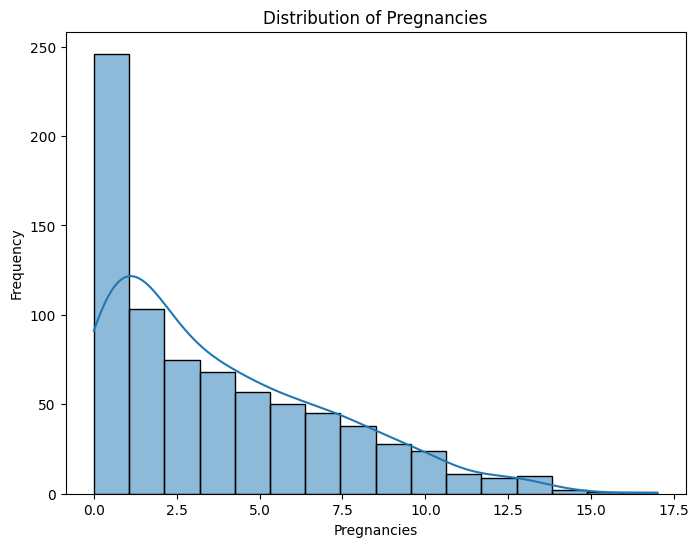

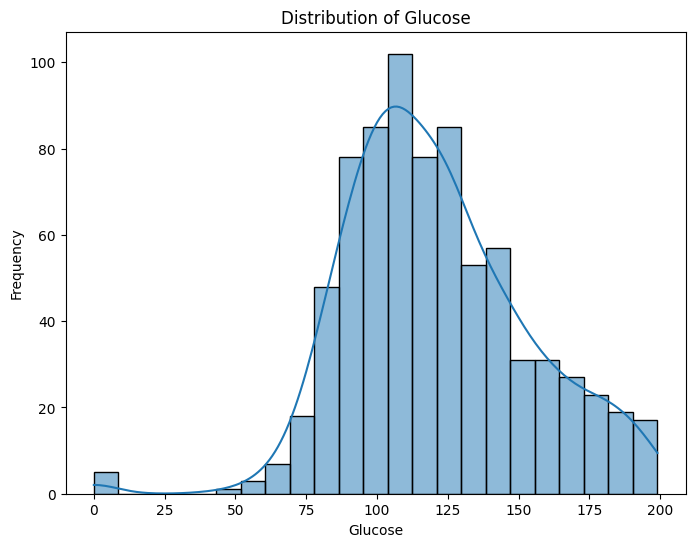

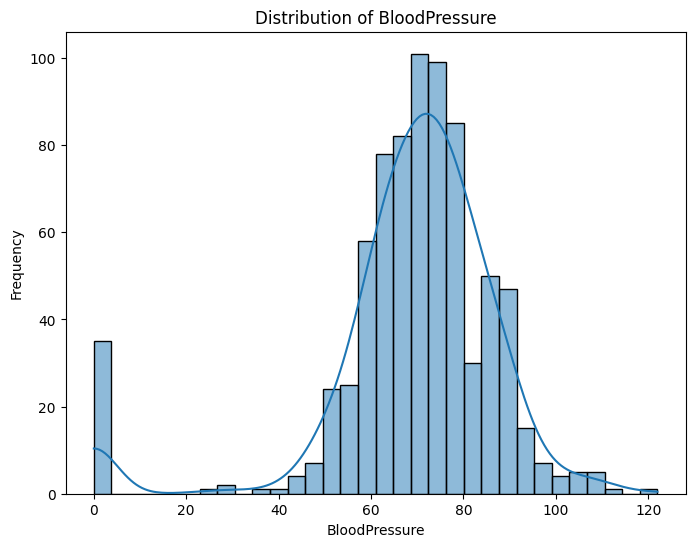

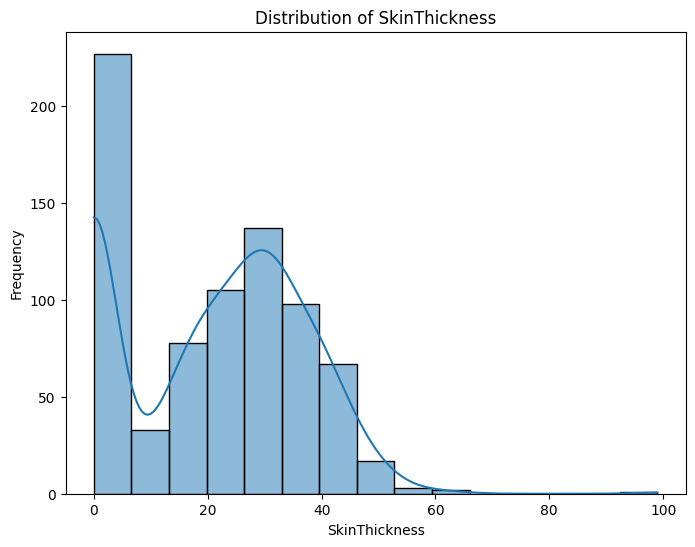

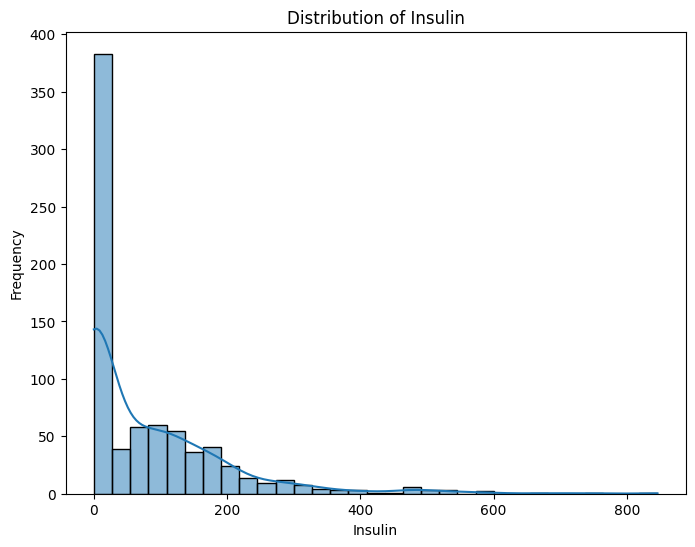

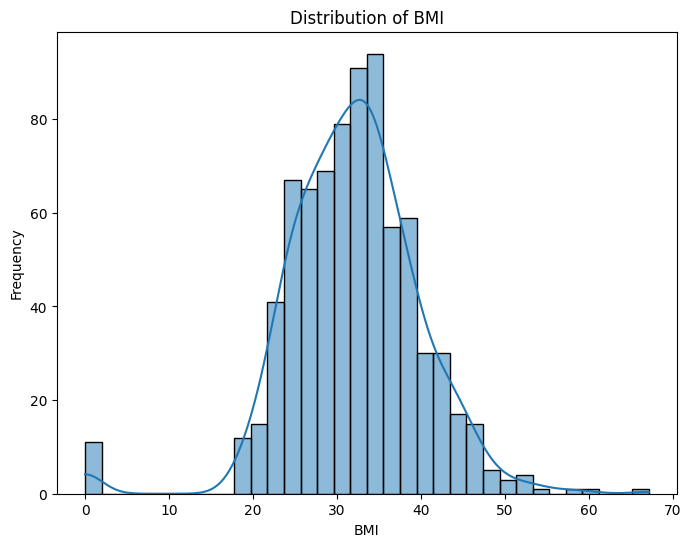

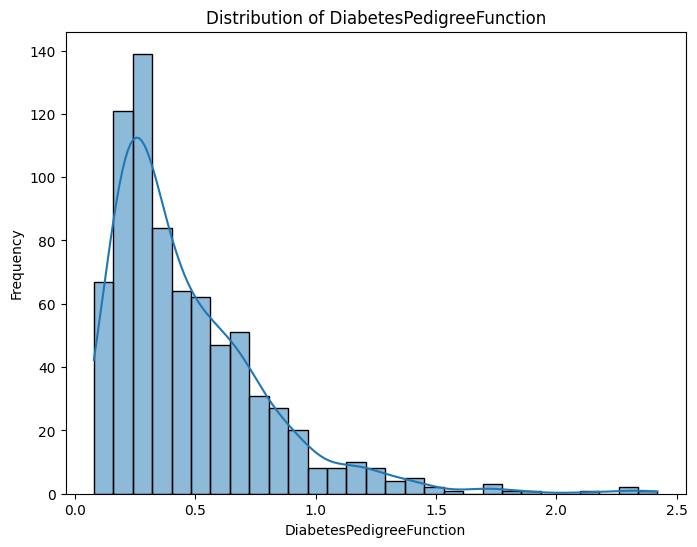

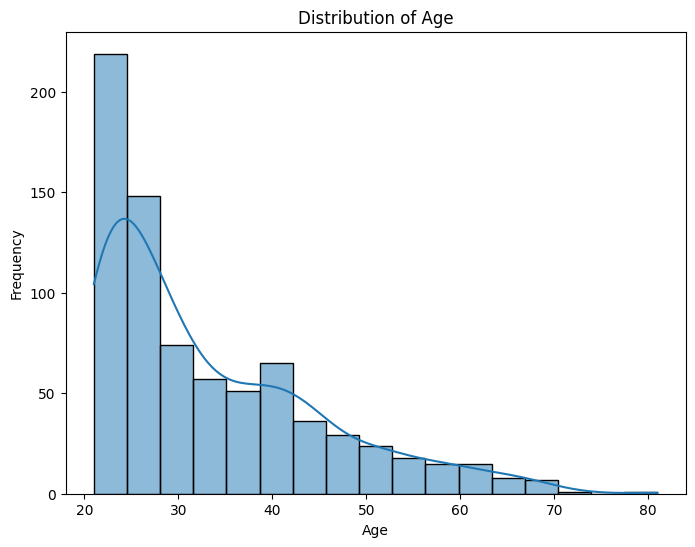

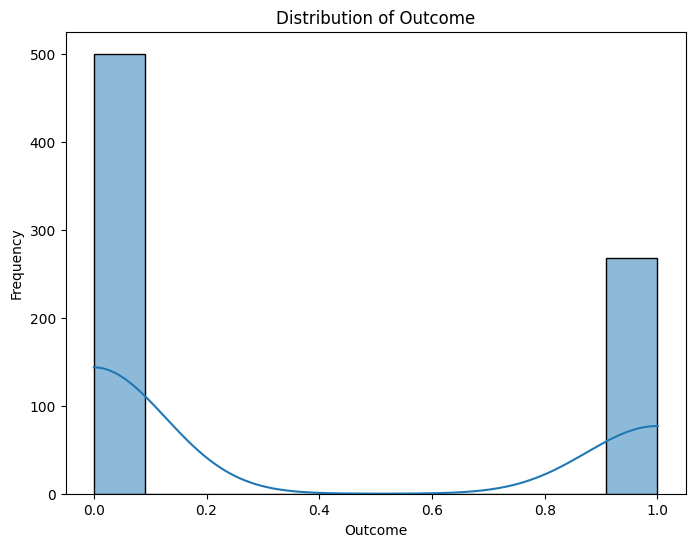

In [ ]:
# histograms for all numeric columns
numeric_columns = diabetes_data.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(diabetes_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

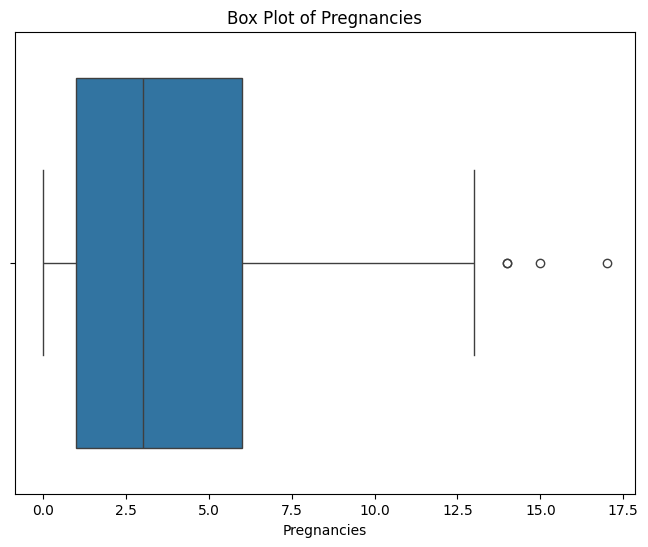

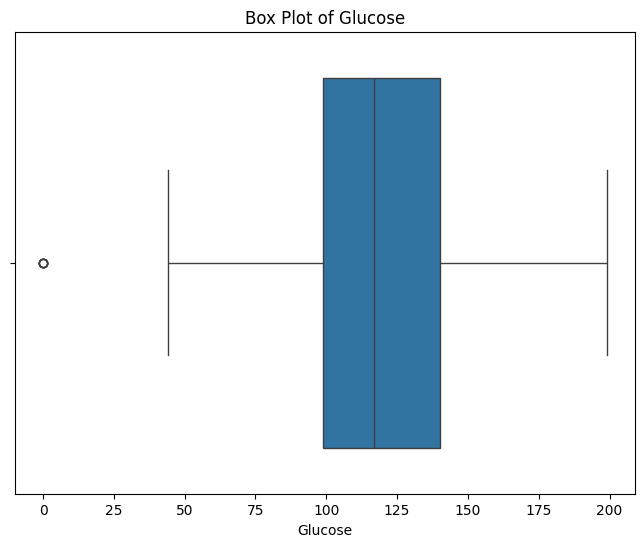

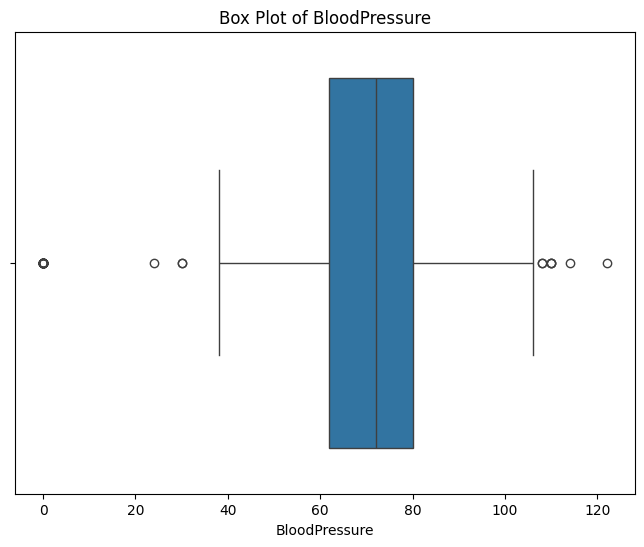

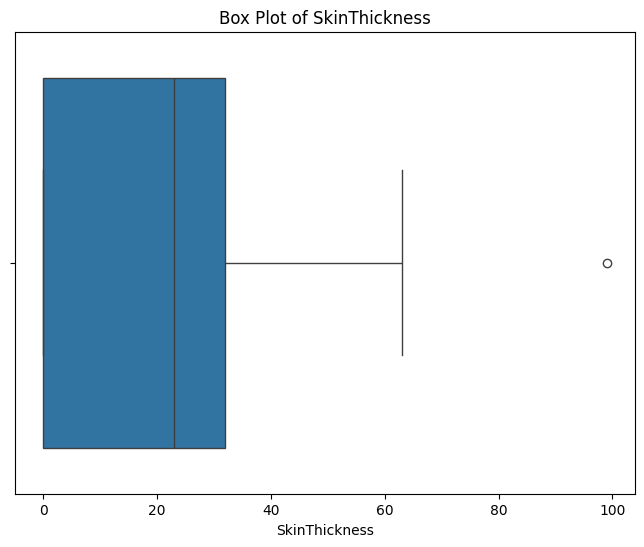

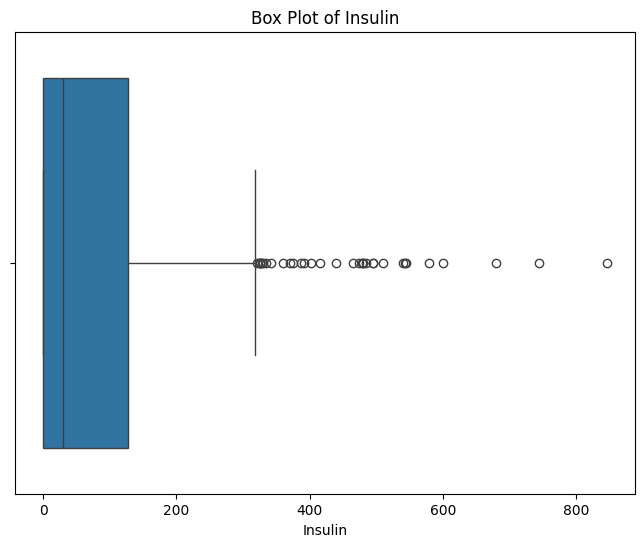

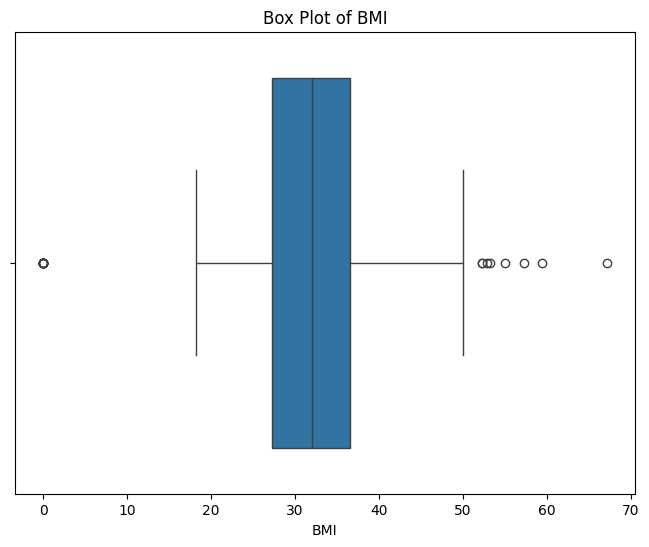

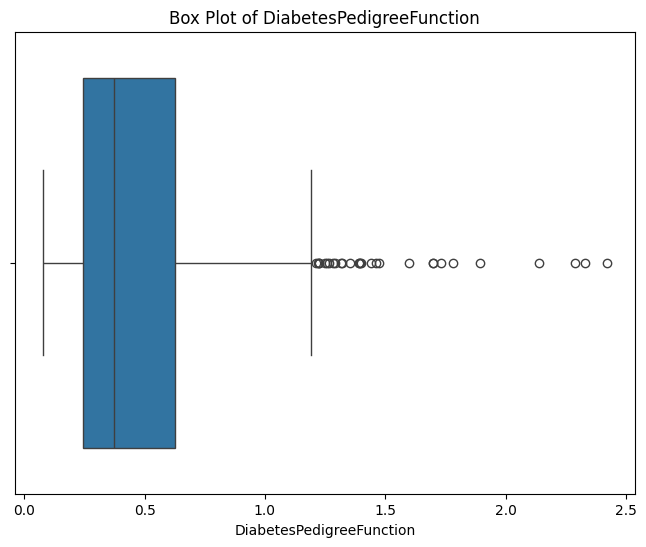

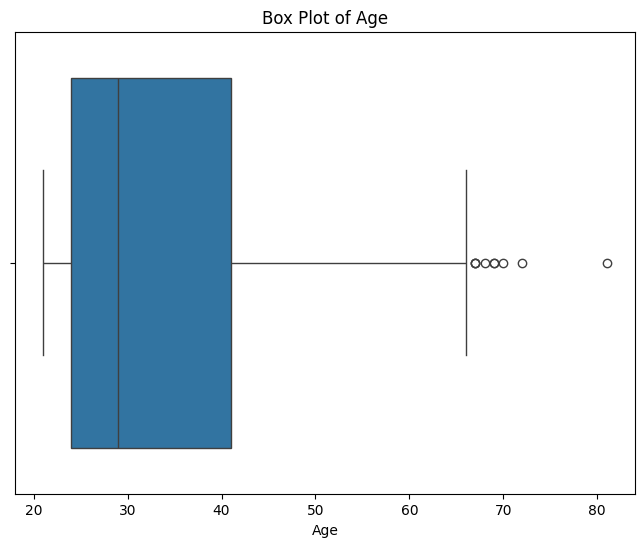

In [ ]:
# Box plots for all numeric columns

numeric_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Box plots for all numeric columns
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=diabetes_data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()


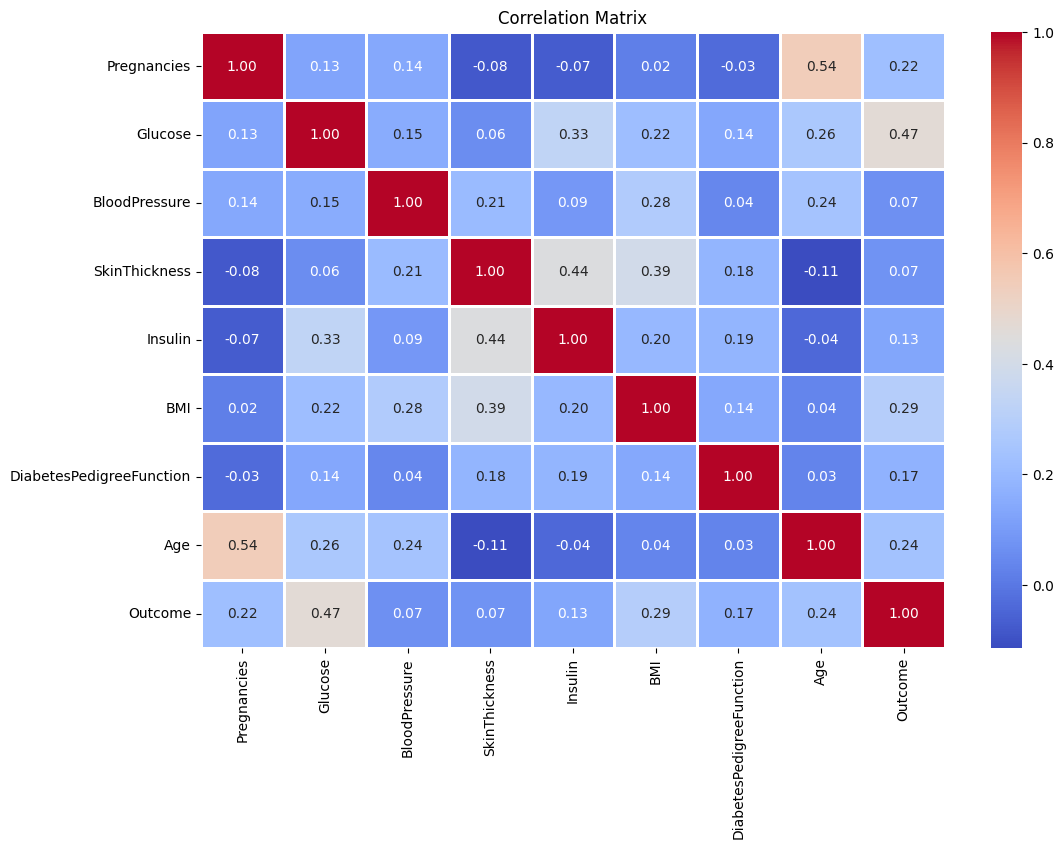

In [ ]:
# Calculate the correlation matrix
correlation_matrix = diabetes_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Matrix')
plt.show()


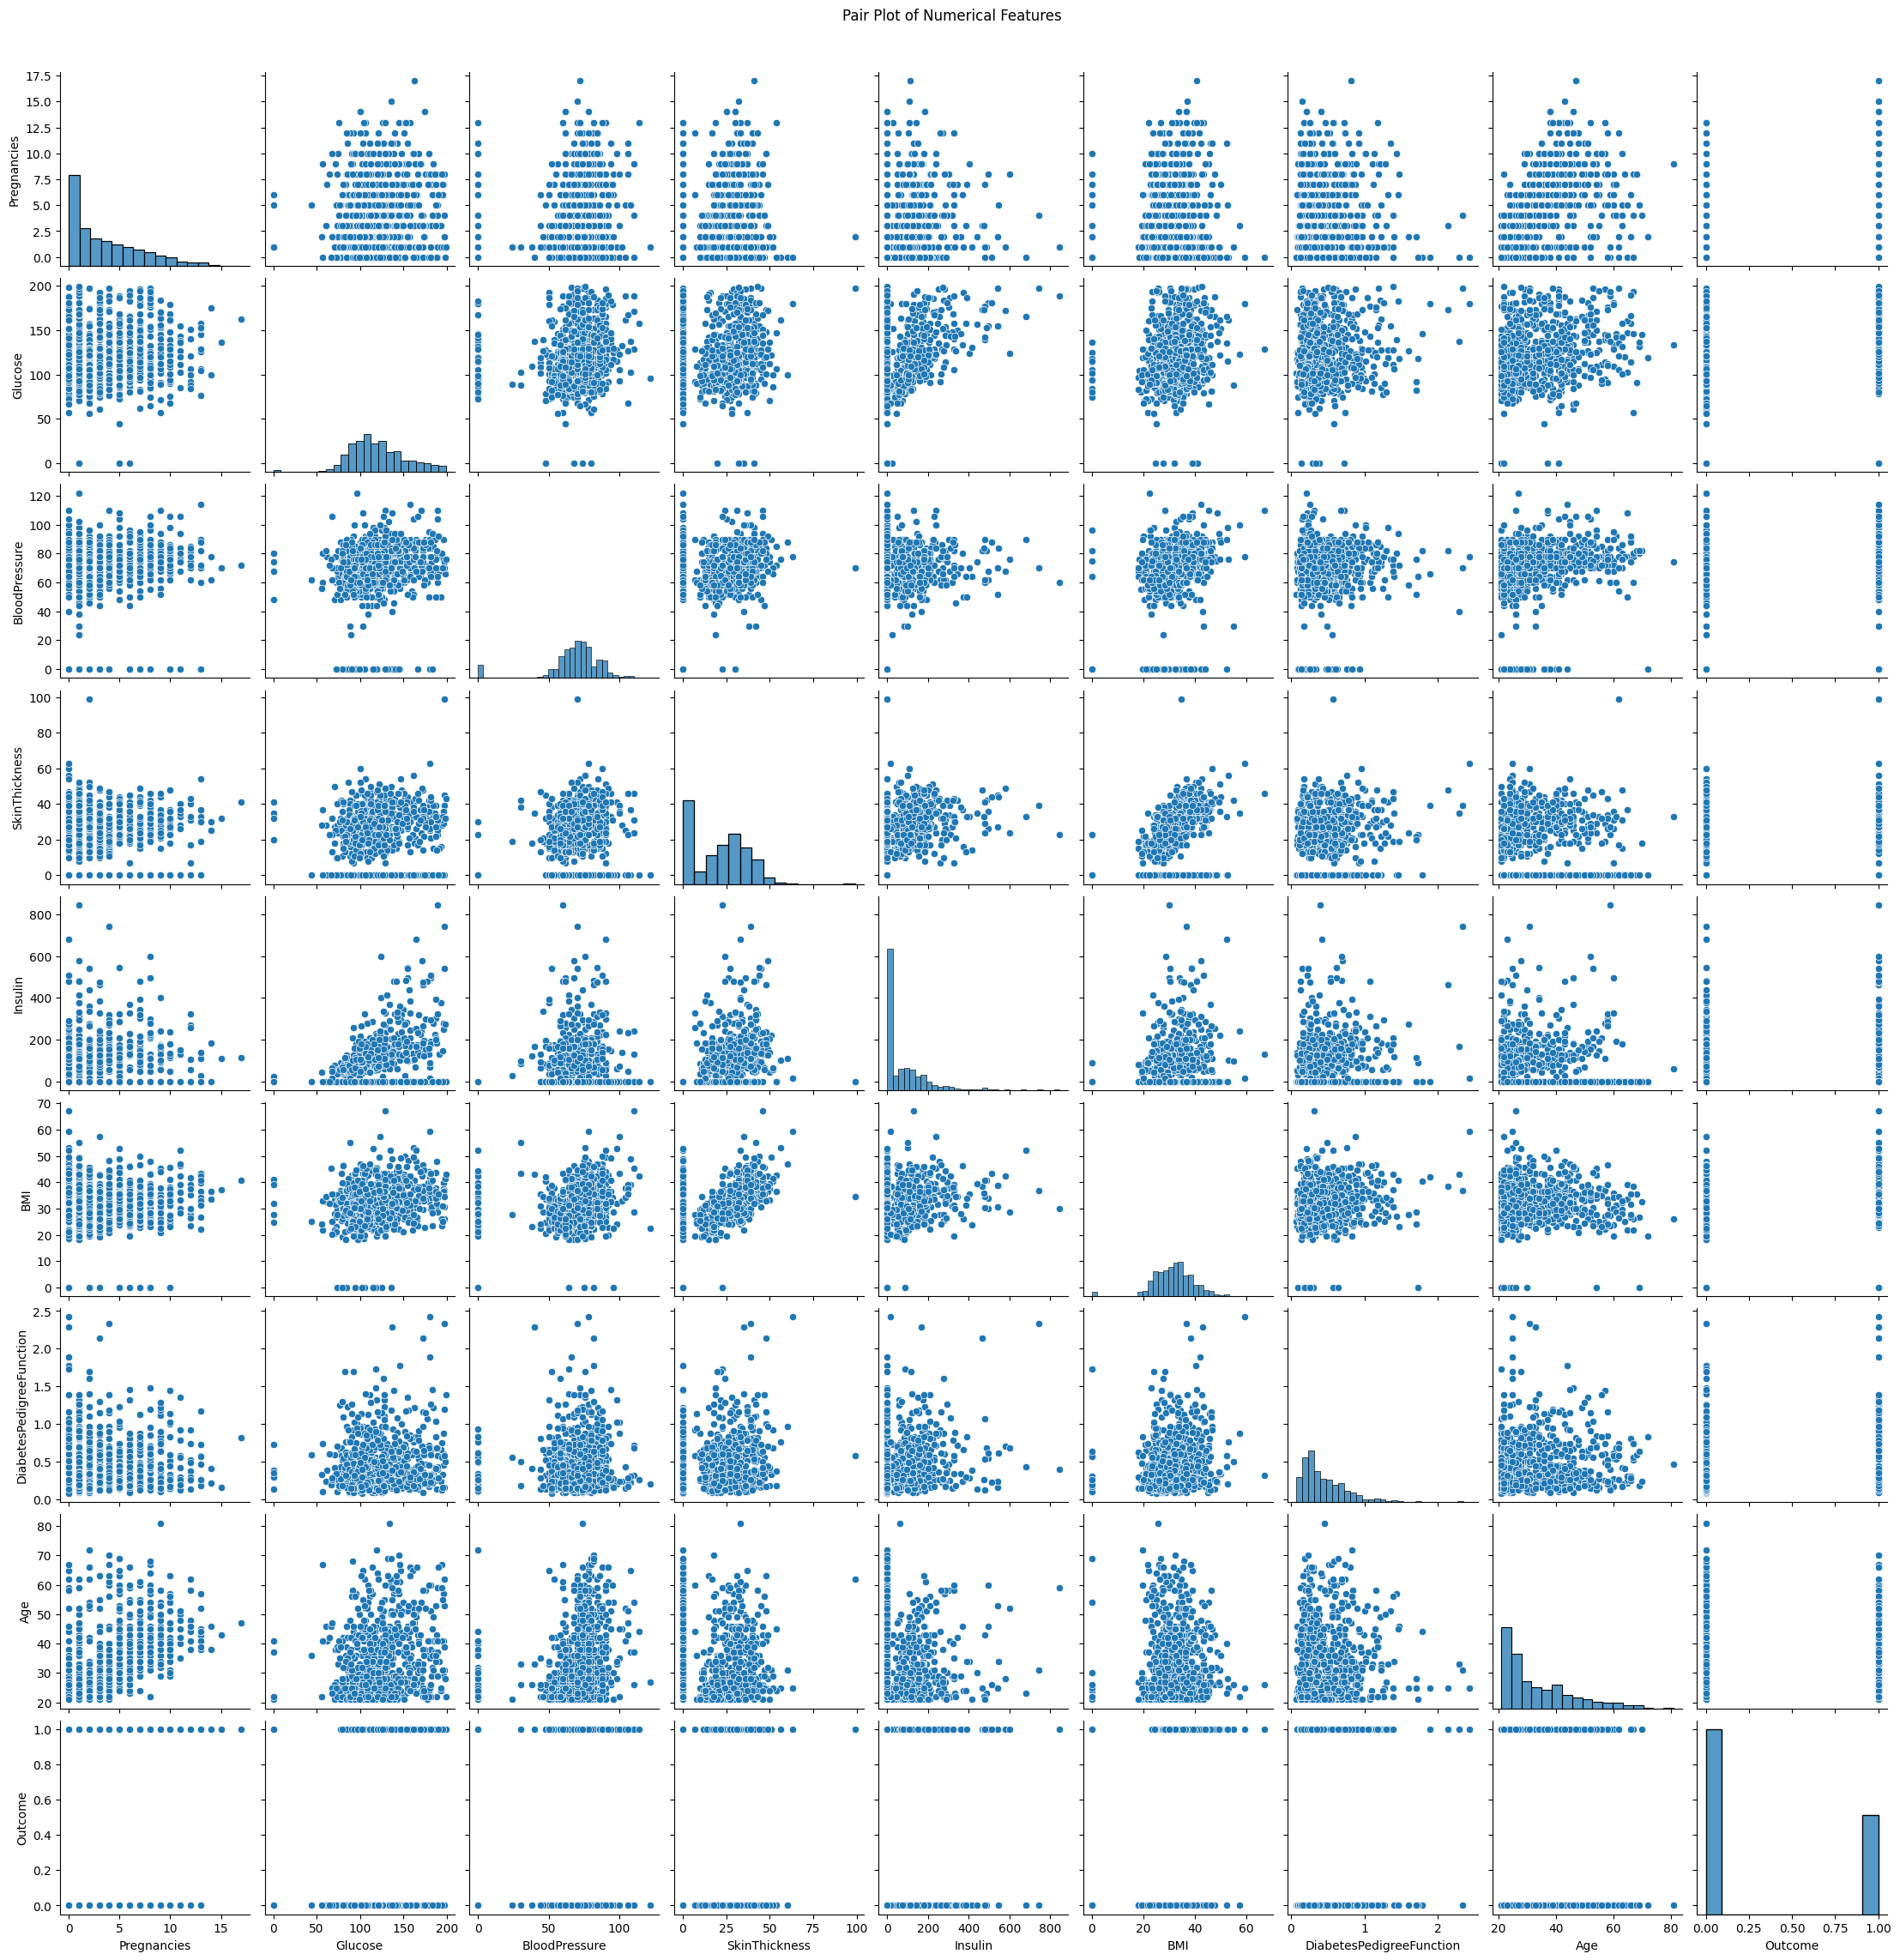

In [ ]:
# Pair plot for numerical columns
sns.pairplot(diabetes_data[numeric_columns])
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()


<ipython-input-14-73c30a412cfb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=diabetes_data, palette='Set2')


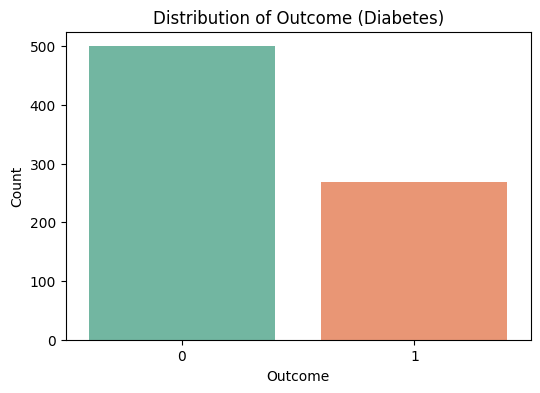

In [ ]:
# Count plot for Outcome (target variable)
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=diabetes_data, palette='Set2')
plt.title('Distribution of Outcome (Diabetes)')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()


<ipython-input-23-1adaf9d8b997>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outcome', y='Glucose', data=diabetes_data, palette='Set1')


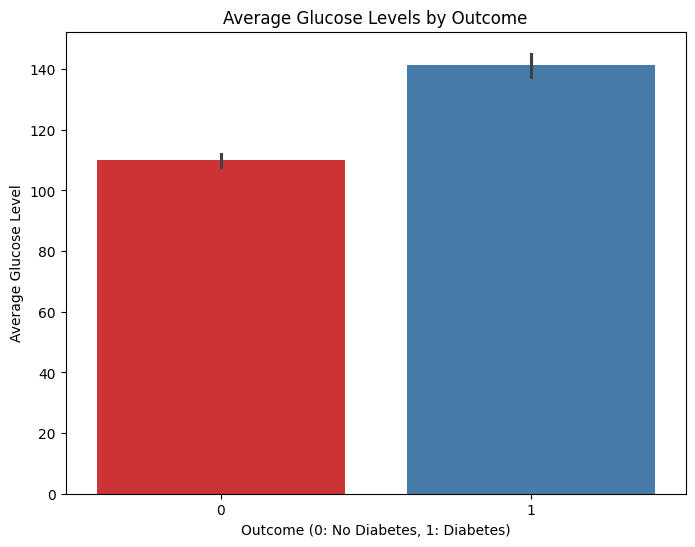

In [ ]:
# Bar plot for glucose levels by Outcome
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='Glucose', data=diabetes_data, palette='Set1')
plt.title('Average Glucose Levels by Outcome')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Average Glucose Level')
plt.show()


##**5**.Insights and Observations##

* **Glucose and Diabetes:** A strong positive correlation between glucose levels and the outcome variable suggests that higher glucose levels are closely associated with the presence of diabetes.

* BMI, Insulin, Blood Pressure, and Skin Thickness: These variables also show a potential correlation with diabetes, especially BMI and insulin, which are known risk factors for diabetes.
Outliers: Outliers were found in features like Insulin, SkinThickness, and BMI, which may need to be addressed for better model accuracy.

* Balanced Target Variable: The distribution of the target variable (Outcome) is fairly balanced, making it suitable for training predictive models without excessive class imbalance.

theory


2. Data Cleaning:
Before performing any analysis, it is important to clean the data to ensure the results are accurate.

Handling Missing Values:
In this dataset, missing values are often represented as zeros (e.g., zero BMI or Blood Pressure is not realistic). Such entries were identified and either imputed with the mean/median or removed.

Handling Duplicates:
Duplicate records were checked and removed to avoid bias in the analysis.

Identifying Outliers:
Box plots and statistical methods were used to detect extreme outlier values, which were then examined to decide whether to keep or remove them.

Data Type Validation:
All columns were checked to confirm that the data types were appropriate for the kind of analysis (e.g., numeric features must be float or integer).

3. Descriptive Statistics:
Summary statistics were calculated to better understand the data distribution.

For Numeric Columns:

Mean, Median, Mode

Standard Deviation

Minimum and Maximum values

For Categorical Columns:

Frequency distributions were created for the Outcome column to understand the balance between diabetic and non-diabetic patients.

4. Data Visualization:
Visualization helps to uncover hidden patterns and relationships in the data.

Histogram:
To observe the distribution of each numeric feature.

Box Plot:
To visualize the spread of the data and detect outliers.

Correlation Matrix:
To understand the linear relationships between different features. A heatmap was plotted to make it visually intuitive.

Pair Plot:
To see pairwise relationships between variables, especially how they separate between diabetic and non-diabetic cases.

Count Plot:
To see the count of diabetic vs non-diabetic individuals.

Bar Plot:
To explore the relationship between categorical/numeric variables and the outcome.
